In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from google.colab import files
uploaded = files.upload()

In [3]:
train = pd.read_csv('train.csv')
test_to_send = pd.read_csv('test.csv')

y = train.loc[:, 'revenue'].to_numpy()
train.drop(['revenue'], axis=1, inplace=True)
train.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37
0,0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,2,5,4,5,5,3,5,5.0,1,2,2,2,4,5,4,1,3,3,1,1,1.0,4.0,2.0,3.0,5,3,4,5,5,4,3,4
1,1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,2,5,5,5,5,1,5,5.0,0,0,0,0,0,3,2,1,3,2,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,0
2,2,03/09/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,3,5,5,5,5,2,5,5.0,0,0,0,0,0,1,1,1,1,1,0,0,0.0,0.0,1.0,3.0,0,0,0,0,0,0,0,0
3,3,02/02/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,4,10,8,10,10,8,10,7.5,6,4,9,3,12,20,12,6,1,10,2,2,2.5,2.5,2.5,7.5,25,12,10,6,18,12,12,6
4,4,05/09/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,2,5,5,5,5,2,5,5.0,2,1,2,1,4,2,2,1,2,1,2,3,3.0,5.0,1.0,3.0,5,1,3,2,3,4,3,3


In [4]:
df = pd.concat([train, test_to_send], ignore_index=True)
df.drop(['Id'], axis=1, inplace=True)
df

,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37
0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,2,5,4,5,5,3,5,5.0,1,2,2,2,4,5,4,1,3,3,1,1,1.0,4.0,2.0,3.0,5,3,4,5,5,4,3,4
1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,2,5,5,5,5,1,5,5.0,0,0,0,0,0,3,2,1,3,2,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,0
2,03/09/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,3,5,5,5,5,2,5,5.0,0,0,0,0,0,1,1,1,1,1,0,0,0.0,0.0,1.0,3.0,0,0,0,0,0,0,0,0
3,02/02/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,4,10,8,10,10,8,10,7.5,6,4,9,3,12,20,12,6,1,10,2,2,2.5,2.5,2.5,7.5,25,12,10,6,18,12,12,6
4,05/09/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,2,5,5,5,5,2,5,5.0,2,1,2,1,4,2,2,1,2,1,2,3,3.0,5.0,1.0,3.0,5,1,3,2,3,4,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100132,01/05/2000,Antalya,Other,FC,5,5.0,4.0,4.0,2,2,5,5,4,4,4,4,4.0,0,0,0,0,0,3,1,1,3,2,0,0,0.0,0.0,2.0,3.0,0,0,0,0,0,0,0,0
100133,07/18/2011,Niğde,Other,IL,1,2.0,4.0,3.0,1,1,1,5,5,5,2,4,5.0,0,0,0,1,0,1,1,1,1,2,0,0,0.0,0.0,1.0,3.0,5,0,0,0,4,0,0,0
100134,12/29/2012,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,1,2,5,3,4,5,5,4,5.0,0,4,4,3,3,3,5,4,5,5,4,4,4.0,3.0,4.0,1.0,5,5,3,2,4,4,4,2
100135,10/12/2013,İstanbul,Big Cities,FC,12,7.5,6.0,6.0,4,4,10,10,10,10,6,10,7.5,0,0,0,0,0,20,9,3,3,15,0,2,0.0,0.0,7.5,5.0,0,0,0,4,0,0,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100137 entries, 0 to 100136
Data columns (total 41 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Open Date   100137 non-null  object 
 1   City        100137 non-null  object 
 2   City Group  100137 non-null  object 
 3   Type        100137 non-null  object 
 4   P1          100137 non-null  int64  
 5   P2          100137 non-null  float64
 6   P3          100137 non-null  float64
 7   P4          100137 non-null  float64
 8   P5          100137 non-null  int64  
 9   P6          100137 non-null  int64  
 10  P7          100137 non-null  int64  
 11  P8          100137 non-null  int64  
 12  P9          100137 non-null  int64  
 13  P10         100137 non-null  int64  
 14  P11         100137 non-null  int64  
 15  P12         100137 non-null  int64  
 16  P13         100137 non-null  float64
 17  P14         100137 non-null  int64  
 18  P15         100137 non-null  int64  
 19  P1

In [6]:
df.replace(['Big Cities', 'Other'], [0, 1], inplace=True)
df = pd.concat([df, pd.get_dummies(df.Type, drop_first=True)], sort=False, axis=1)
df.drop(['Type'], axis=1, inplace=True, errors='ignore')
df.head()

,Open Date,City,City Group,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,FC,IL,MB
0,07/17/1999,İstanbul,0,4,5.0,4.0,4.0,2,2,5,4,5,5,3,5,5.0,1,2,2,2,4,5,4,1,3,3,1,1,1.0,4.0,2.0,3.0,5,3,4,5,5,4,3,4,0,1,0
1,02/14/2008,Ankara,0,4,5.0,4.0,4.0,1,2,5,5,5,5,1,5,5.0,0,0,0,0,0,3,2,1,3,2,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,0,1,0,0
2,03/09/2013,Diyarbakır,1,2,4.0,2.0,5.0,2,3,5,5,5,5,2,5,5.0,0,0,0,0,0,1,1,1,1,1,0,0,0.0,0.0,1.0,3.0,0,0,0,0,0,0,0,0,0,1,0
3,02/02/2012,Tokat,1,6,4.5,6.0,6.0,4,4,10,8,10,10,8,10,7.5,6,4,9,3,12,20,12,6,1,10,2,2,2.5,2.5,2.5,7.5,25,12,10,6,18,12,12,6,0,1,0
4,05/09/2009,Gaziantep,1,3,4.0,3.0,4.0,2,2,5,5,5,5,2,5,5.0,2,1,2,1,4,2,2,1,2,1,2,3,3.0,5.0,1.0,3.0,5,1,3,2,3,4,3,3,0,1,0


In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

demographics = df.loc[:, 'P1':'P37']
demographics = StandardScaler().fit_transform(demographics)
demographics = pd.DataFrame(demographics, columns=[f'P{i}' for i in range(1, 38)])

pca = PCA(n_components='mle', svd_solver='full')
demographics = pca.fit_transform(demographics)
demographics = pd.DataFrame(demographics, columns=[f'P{i}' for i in range(1, 34)])
demographics.head()

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33
0,1.336850,-2.207277,-0.724062,-0.318719,1.420941,-0.496716,0.235570,1.481136,-0.441331,1.153969,-0.272114,0.719916,-0.275265,-0.124349,0.127619,0.104897,0.023599,0.504390,0.360948,0.596832,-0.459434,0.144888,-0.447002,0.449428,0.017565,0.554260,0.296065,0.151852,0.399699,-0.772232,0.139313,-0.279218,0.221497
1,-2.512424,0.550097,0.018069,-0.958140,-0.001187,-0.938118,0.217957,-0.120139,0.379787,-0.017236,0.212118,0.421758,0.202120,0.183748,-0.010587,0.377182,-0.297437,0.038068,-0.163454,0.072293,0.100165,0.039719,-0.072568,-0.224645,0.164013,0.105574,0.113668,-0.047466,-0.064329,0.051386,-0.018581,0.061964,-0.019744
2,-3.049290,0.240873,-1.315727,0.649424,1.158456,-0.439579,-0.645397,-1.220352,0.362908,-0.727040,-1.095700,0.273734,-0.810830,0.316153,0.094588,-0.182519,-0.007206,-0.146839,-0.041900,0.045831,0.125457,-0.303706,0.092473,-0.002841,-0.021268,-0.024426,-0.089176,-0.069244,-0.002541,-0.081470,0.040357,-0.050944,-0.071018
3,12.116868,0.700573,-3.882168,1.858510,0.726517,0.661214,3.500790,2.537229,0.128402,0.337683,-0.824925,0.638118,-1.035618,-0.483745,0.080339,-0.808996,0.054540,-0.443157,-1.601056,1.194999,0.002982,-0.384111,0.866321,0.705428,-0.025486,0.095760,-0.079370,-0.575314,0.864654,-1.057265,0.739155,0.850674,0.181845
4,0.320302,-2.453057,-1.692919,-0.152219,0.986325,-0.678697,-1.340906,0.529113,-0.206540,0.224186,-0.474226,0.162847,-0.011607,0.502606,-0.398163,-0.091095,0.191504,-0.387761,-0.121651,-0.043911,0.106008,-0.335498,0.239030,-0.051636,0.136081,-0.021839,-0.073714,0.350980,0.014234,-0.167196,0.359591,0.029809,-0.233581


In [8]:
df.drop(['P34', 'P35', 'P36', 'P37'], axis=1, inplace=True, errors='ignore')
for i in range(1, 34):
    df[f'P{i}'] = demographics[f'P{i}']
df.head()

,Open Date,City,City Group,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,FC,IL,MB
0,07/17/1999,İstanbul,0,1.336850,-2.207277,-0.724062,-0.318719,1.420941,-0.496716,0.235570,1.481136,-0.441331,1.153969,-0.272114,0.719916,-0.275265,-0.124349,0.127619,0.104897,0.023599,0.504390,0.360948,0.596832,-0.459434,0.144888,-0.447002,0.449428,0.017565,0.554260,0.296065,0.151852,0.399699,-0.772232,0.139313,-0.279218,0.221497,0,1,0
1,02/14/2008,Ankara,0,-2.512424,0.550097,0.018069,-0.958140,-0.001187,-0.938118,0.217957,-0.120139,0.379787,-0.017236,0.212118,0.421758,0.202120,0.183748,-0.010587,0.377182,-0.297437,0.038068,-0.163454,0.072293,0.100165,0.039719,-0.072568,-0.224645,0.164013,0.105574,0.113668,-0.047466,-0.064329,0.051386,-0.018581,0.061964,-0.019744,1,0,0
2,03/09/2013,Diyarbakır,1,-3.049290,0.240873,-1.315727,0.649424,1.158456,-0.439579,-0.645397,-1.220352,0.362908,-0.727040,-1.095700,0.273734,-0.810830,0.316153,0.094588,-0.182519,-0.007206,-0.146839,-0.041900,0.045831,0.125457,-0.303706,0.092473,-0.002841,-0.021268,-0.024426,-0.089176,-0.069244,-0.002541,-0.081470,0.040357,-0.050944,-0.071018,0,1,0
3,02/02/2012,Tokat,1,12.116868,0.700573,-3.882168,1.858510,0.726517,0.661214,3.500790,2.537229,0.128402,0.337683,-0.824925,0.638118,-1.035618,-0.483745,0.080339,-0.808996,0.054540,-0.443157,-1.601056,1.194999,0.002982,-0.384111,0.866321,0.705428,-0.025486,0.095760,-0.079370,-0.575314,0.864654,-1.057265,0.739155,0.850674,0.181845,0,1,0
4,05/09/2009,Gaziantep,1,0.320302,-2.453057,-1.692919,-0.152219,0.986325,-0.678697,-1.340906,0.529113,-0.206540,0.224186,-0.474226,0.162847,-0.011607,0.502606,-0.398163,-0.091095,0.191504,-0.387761,-0.121651,-0.043911,0.106008,-0.335498,0.239030,-0.051636,0.136081,-0.021839,-0.073714,0.350980,0.014234,-0.167196,0.359591,0.029809,-0.233581,0,1,0


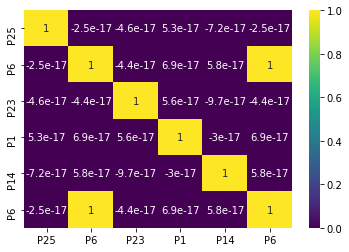

In [9]:
import seaborn as sns
from random import randrange
sns.heatmap(df.iloc[:, [randrange(3, 36) for x in range(6)]].corr(), cmap='viridis', annot=True)
plt.show()

In [10]:
df.drop(['City'], axis=1, inplace=True, errors='ignore')

In [11]:
def date_to_months(x):
    return (2020 - int(x[6:10])) * 12 + (12 - int(x[:2]))

df['Open Date'] = df['Open Date'].apply(date_to_months)

In [12]:
df['Open Date'] = StandardScaler().fit_transform(df['Open Date'].to_numpy().reshape(-1, 1))
df

,Open Date,City Group,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,FC,IL,MB
0,1.923313,0,1.336850,-2.207277,-0.724062,-0.318719,1.420941,-0.496716,0.235570,1.481136,-0.441331,1.153969,-0.272114,0.719916,-0.275265,-0.124349,0.127619,0.104897,0.023599,0.504390,0.360948,0.596832,-0.459434,0.144888,-0.447002,0.449428,0.017565,0.554260,0.296065,0.151852,0.399699,-0.772232,0.139313,-0.279218,0.221497,0,1,0
1,0.130267,0,-2.512424,0.550097,0.018069,-0.958140,-0.001187,-0.938118,0.217957,-0.120139,0.379787,-0.017236,0.212118,0.421758,0.202120,0.183748,-0.010587,0.377182,-0.297437,0.038068,-0.163454,0.072293,0.100165,0.039719,-0.072568,-0.224645,0.164013,0.105574,0.113668,-0.047466,-0.064329,0.051386,-0.018581,0.061964,-0.019744,1,0,0
2,-0.931635,1,-3.049290,0.240873,-1.315727,0.649424,1.158456,-0.439579,-0.645397,-1.220352,0.362908,-0.727040,-1.095700,0.273734,-0.810830,0.316153,0.094588,-0.182519,-0.007206,-0.146839,-0.041900,0.045831,0.125457,-0.303706,0.092473,-0.002841,-0.021268,-0.024426,-0.089176,-0.069244,-0.002541,-0.081470,0.040357,-0.050944,-0.071018,0,1,0
3,-0.705328,1,12.116868,0.700573,-3.882168,1.858510,0.726517,0.661214,3.500790,2.537229,0.128402,0.337683,-0.824925,0.638118,-1.035618,-0.483745,0.080339,-0.808996,0.054540,-0.443157,-1.601056,1.194999,0.002982,-0.384111,0.866321,0.705428,-0.025486,0.095760,-0.079370,-0.575314,0.864654,-1.057265,0.739155,0.850674,0.181845,0,1,0
4,-0.130857,1,0.320302,-2.453057,-1.692919,-0.152219,0.986325,-0.678697,-1.340906,0.529113,-0.206540,0.224186,-0.474226,0.162847,-0.011607,0.502606,-0.398163,-0.091095,0.191504,-0.387761,-0.121651,-0.043911,0.106008,-0.335498,0.239030,-0.051636,0.136081,-0.021839,-0.073714,0.350980,0.014234,-0.167196,0.359591,0.029809,-0.233581,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100132,1.818864,1,-2.661202,0.183105,0.707146,0.100191,0.745327,-0.508858,0.051922,-0.031748,0.536094,0.230887,0.406974,0.110280,0.694372,-0.651374,0.008854,-0.134487,0.009558,-0.102118,-0.311192,-0.162360,-0.517579,-0.278104,0.058444,-0.232731,-0.061945,-0.079411,-0.521798,0.265136,-0.029064,-0.153203,-0.255414,-0.130940,0.126064,1,0,0
100133,-0.583471,1,-3.336294,-1.103240,-1.614374,0.765236,-1.636140,-0.341017,0.617059,0.566879,0.232119,-0.469438,-0.406598,-0.255655,0.296131,-0.013422,-0.181512,0.935247,0.123797,-0.023390,-0.378314,0.115715,-0.292750,0.118066,0.279597,-0.137540,0.152234,-0.463610,-0.119793,0.026058,0.590874,-0.564517,-0.140527,-0.008707,0.070941,0,1,0
100134,-0.879410,0,1.919983,-3.043813,2.057348,-0.351959,0.051338,-0.381607,-0.144191,0.647980,-1.093681,-0.764056,0.668957,0.989291,-0.564935,0.289984,-0.105327,-0.221863,-0.289921,-0.200902,0.114522,-0.302688,0.366119,0.367252,-0.124246,-0.263666,-0.107265,-0.338439,-0.593219,-0.178100,0.117067,-0.351098,-0.534466,0.221109,0.538908,0,1,0
100135,-1.053492,0,4.386806,7.679818,-0.144388,-0.924666,0.144552,-0.963783,-0.493067,0.507866,-0.678254,1.109130,1.287679,-0.284563,-0.571268,0.182864,0.736757,-0.759606,-0.336551,0.814410,-0.582512,-0.273422,-1.008860,0.356117,-1.620492,0.722889,-0.359136,0.495503,0.599333,0.928631,0.778168,-0.653166,-0.579214,-0.193606,-0.203956,1,0,0


In [13]:
X = df.iloc[:137, :]
test_to_send_ = df.iloc[137:, :]

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

In [24]:
rfr = RandomForestRegressor(n_estimators=2000)
rfr.fit(X_train, y_train)
preds = rfr.predict(X_test)
print(f'RMSE: {mean_squared_error(y_test, preds)**0.5}')

RMSE: 1305575.7080637773


In [25]:
xgb = XGBRegressor()
xgb.fit(X_train, y_train)
preds = xgb.predict(X_test)
print(f'RMSE: {mean_squared_error(y_test, preds)**0.5}')

[09:32:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE: 1441212.8787568512


In [29]:
preds = RandomForestRegressor(n_estimators=2500).fit(X, y).predict(test_to_send_)

In [30]:
df = pd.DataFrame({'Id': test_to_send.Id, 'Prediction' : preds}, index=None)
df.set_index('Id', inplace=True)
df.to_csv(r'file.csv')
df

,Prediction
Id,
0,4.510139e+06
1,3.652274e+06
2,3.438534e+06
3,3.956315e+06
4,4.487593e+06
...,...
99995,5.844984e+06
99996,3.243832e+06
99997,4.305383e+06
